# Assignment 1

# Write a program of matrix multiplication to demonstrate the performance enhancement done by parallelizing the code through Open MP threads. Analyze the speedup and efficiency of the parallelized code. 

* Vary the size of your matrices from 5, 50, 100, 500, 750, 1000, and 2000 and measure the runtime with one thread. 

* For each matrix size, change the number of threads from 2,4,8,10,15,20 and plot the speedup versus the number of threads. Compute the efficiency. 

* Display a visualization of performance comparison between serial, parallel and NumPY code.

* Explain whether or not the scaling behavior is as expected.

## Using Numpy 

In [32]:
import time
import numpy as np
import concurrent.futures
import pandas as pd

def sequential_matrix_multiply(matrix_a, matrix_b):
    return np.dot(matrix_a, matrix_b)

def parallel_matrix_multiply(matrix_a, matrix_b, num_threads):
    with concurrent.futures.ThreadPoolExecutor(max_workers=num_threads) as executor:
        result = np.zeros_like(matrix_a)
        chunk_size = len(matrix_a) // num_threads
        futures = []

        for i in range(num_threads):
            start_idx = i * chunk_size
            end_idx = start_idx + chunk_size
            futures.append(executor.submit(np.dot, matrix_a[start_idx:end_idx], matrix_b, out=result[start_idx:end_idx]))

        concurrent.futures.wait(futures)

    return result

matrix_sizes = [(5, 5), (50, 50), (100, 100), (250, 250),(500,500), (750, 750), (1000, 1000), (2000, 2000)]

results_list = []

for matrix_size in matrix_sizes:
    rows, cols = matrix_size
    matrix_a = np.random.rand(rows, cols)
    matrix_b = np.random.rand(cols, rows)

    start_time = time.time()
    result_seq = sequential_matrix_multiply(matrix_a, matrix_b)
    sequential_time = time.time() - start_time

    for num_threads in [1,2, 4, 8, 10, 15, 20]:
        start_time = time.time()
        result_parallel = parallel_matrix_multiply(matrix_a, matrix_b, num_threads)
        parallel_time = time.time() - start_time

        results_list.append({
            'Matrix Size': matrix_size,
            'Threads': num_threads,
            'Sequential Time': sequential_time,
            'Parallel Time': parallel_time
        })

df = pd.DataFrame(results_list)
print(df)

     Matrix Size  Threads  Sequential Time  Parallel Time
0         (5, 5)        1         0.001995       0.002012
1         (5, 5)        2         0.001995       0.000989
2         (5, 5)        4         0.001995       0.000000
3         (5, 5)        8         0.001995       0.002000
4         (5, 5)       10         0.001995       0.000999
5         (5, 5)       15         0.001995       0.001001
6         (5, 5)       20         0.001995       0.001000
7       (50, 50)        1         0.000000       0.000000
8       (50, 50)        2         0.000000       0.000999
9       (50, 50)        4         0.000000       0.000000
10      (50, 50)        8         0.000000       0.002000
11      (50, 50)       10         0.000000       0.000999
12      (50, 50)       15         0.000000       0.001001
13      (50, 50)       20         0.000000       0.003000
14    (100, 100)        1         0.000000       0.000000
15    (100, 100)        2         0.000000       0.001000
16    (100, 10

## Using loop

In [33]:
import numpy as np
import threading
import time
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
def multiply_matrix(A, B, result, start_row, end_row):
    try:
        for i in range(start_row, end_row):
            for j in range(N):
                result[i, j] = 0
                for k in range(N):
                    result[i, j] += A[i, k] * B[k, j]
    except NameError as e:
        pass

In [35]:
def measure_time(matrix_size, num_threads=1):
    A = np.random.rand(matrix_size, matrix_size)
    B = np.random.rand(matrix_size, matrix_size)
    result = np.zeros((matrix_size, matrix_size))

    chunk_size = max(1, matrix_size // num_threads)
    threads = []

    start_time = time.time()

    for i in range(0, matrix_size, chunk_size):
        end_row = min(i + chunk_size, matrix_size)
        thread = threading.Thread(target=multiply_matrix, args=(A, B, result, i, end_row))
        thread.start()
        threads.append(thread)

    for thread in threads:
        thread.join()

    end_time = time.time()

    return max(end_time - start_time, 1e-10)

In [36]:
def main():
    matrix_sizes = [5, 50, 100, 250, 500, 750, 1000, 2000]
    thread_counts = [1, 2, 4, 8, 10, 15, 20]

    results = []

    for size in matrix_sizes:
        serial_time = measure_time(size, num_threads=1)

        for threads in thread_counts:
            parallel_time = measure_time(size, num_threads=threads)
            speedup = serial_time / parallel_time
            efficiency = speedup / threads
            results.append({
                'Matrix Size': size,
                'Threads': threads,
                'Serial Time': serial_time,
                'Parallel Time': parallel_time,
                'Speedup': speedup,
                'Efficiency': efficiency
            })

    df = pd.DataFrame(results)
    df.to_csv('matrix_multiplication_results.csv', index=False)

In [37]:
if __name__ == "__main__":
    main()

In [38]:
df2 = pd.read_csv('matrix_multiplication_results.csv')
df2

,Matrix Size,Threads,Serial Time,Parallel Time,Speedup,Efficiency
0,5,1,1.000000e-10,1.000000e-10,1.000000e+00,1.000000e+00
1,5,2,1.000000e-10,1.007080e-03,9.929697e-08,4.964848e-08
2,5,4,1.000000e-10,1.016617e-03,9.836548e-08,2.459137e-08
3,5,8,1.000000e-10,9.911060e-04,1.008974e-07,1.261217e-08
4,5,10,1.000000e-10,1.000166e-03,9.998341e-08,9.998341e-09
5,5,15,1.000000e-10,9.980202e-04,1.001984e-07,6.679892e-09
6,5,20,1.000000e-10,1.002312e-03,9.976936e-08,4.988468e-09
7,50,1,1.000000e-10,1.000000e-10,1.000000e+00,1.000000e+00
8,50,2,1.000000e-10,9.992123e-04,1.000788e-07,5.003942e-08
9,50,4,1.000000e-10,1.000166e-03,9.998341e-08,2.499585e-08


# Display a visualization of performance comparison between serial, parallel and NumPY code

### visualization of performance comparison between serial, parallel using NumPY code

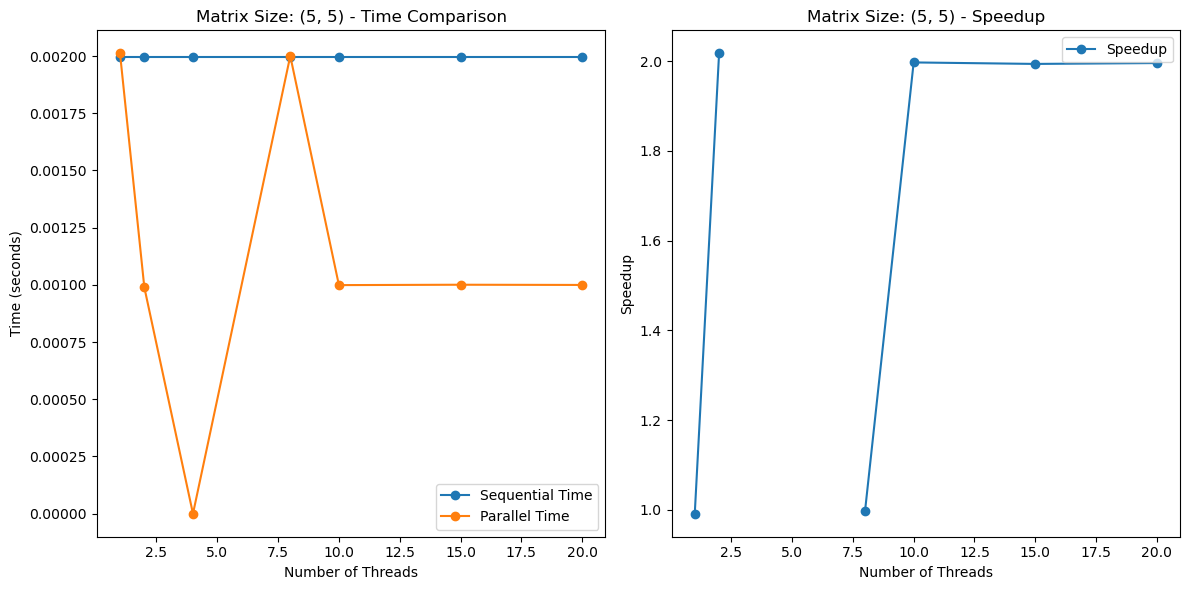

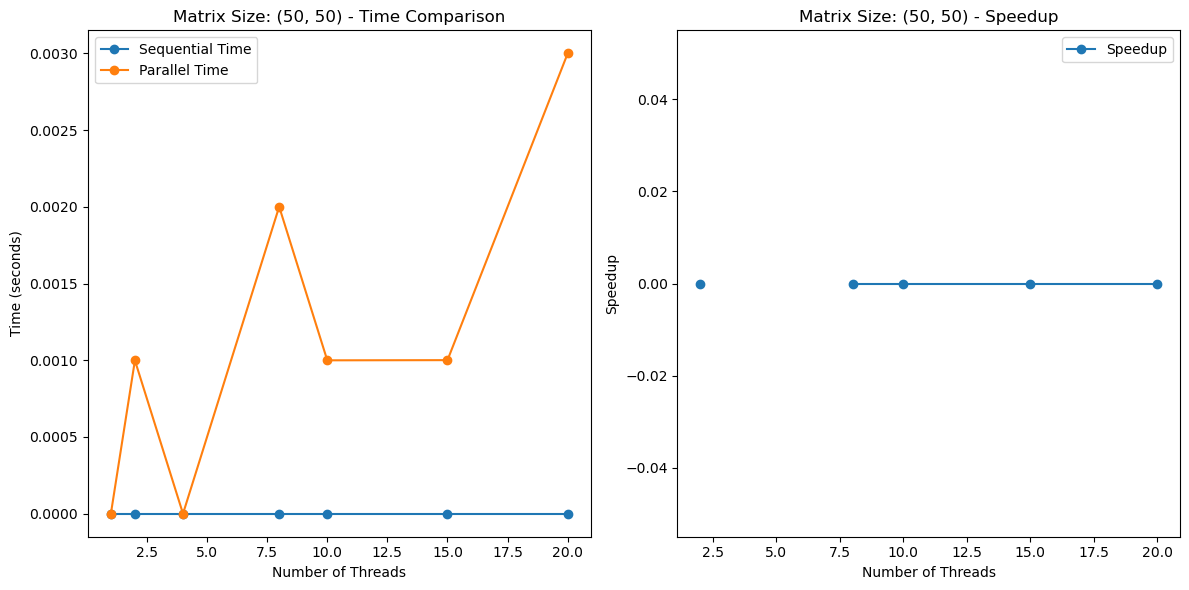

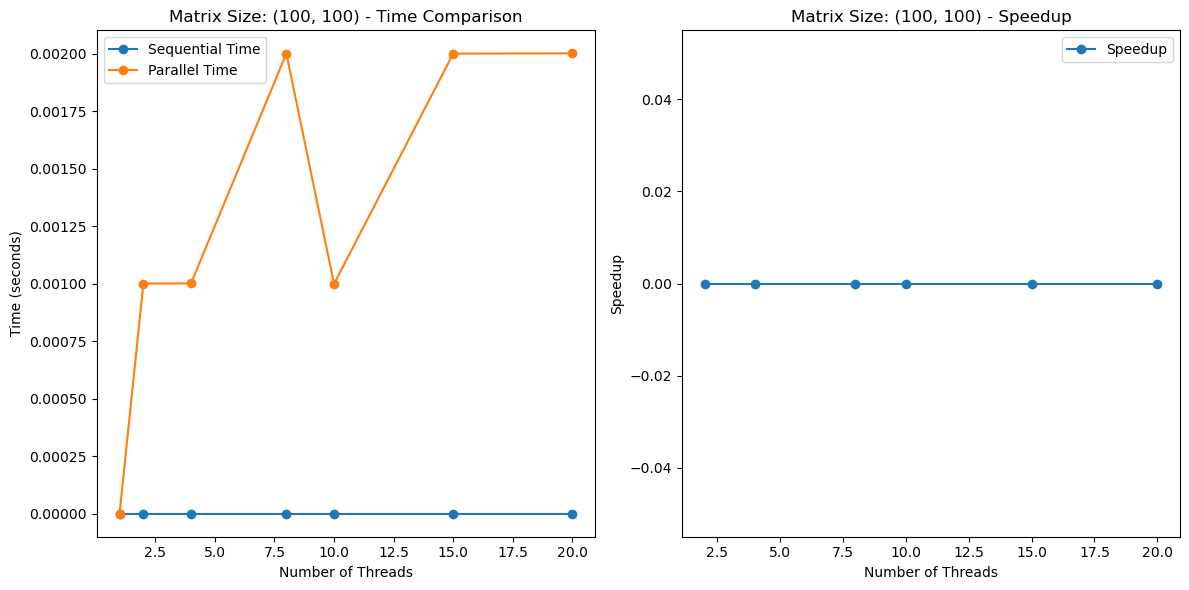

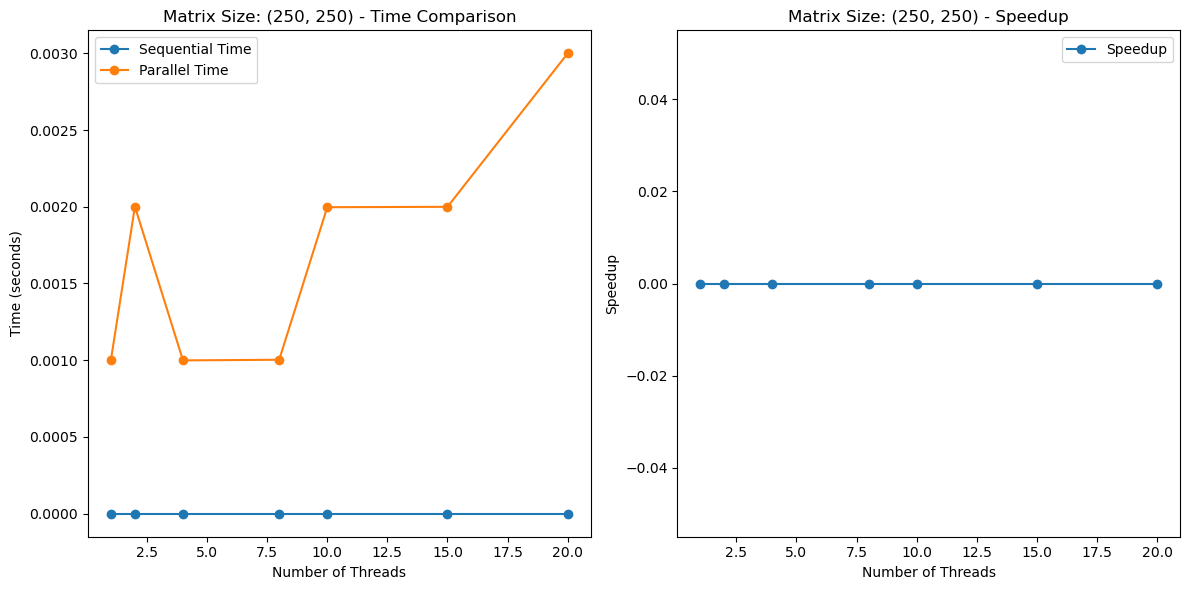

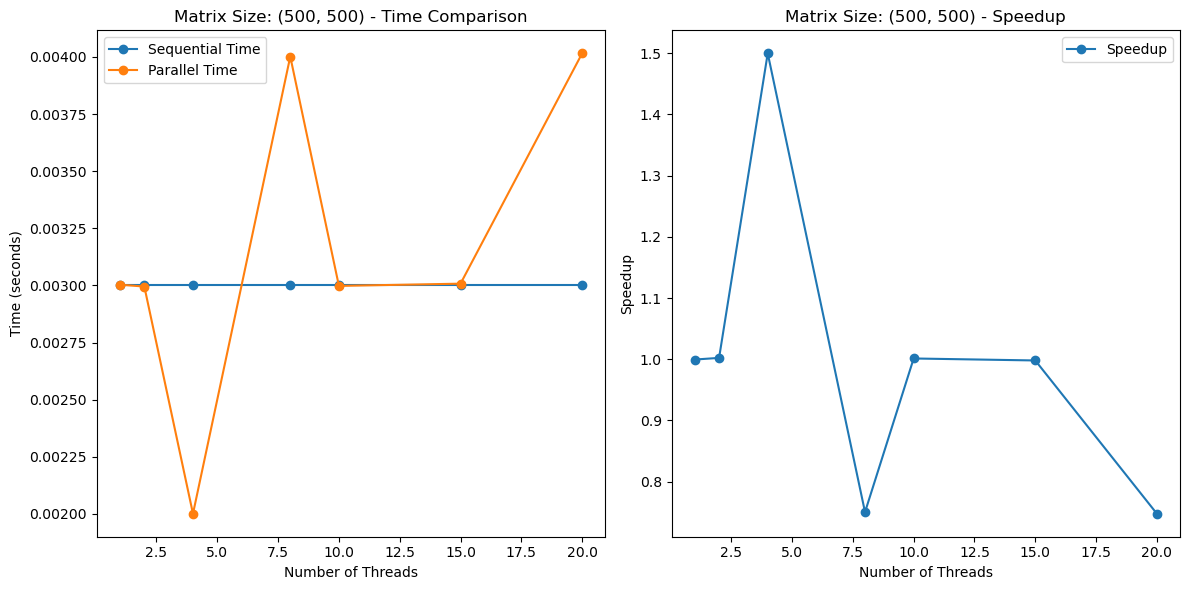

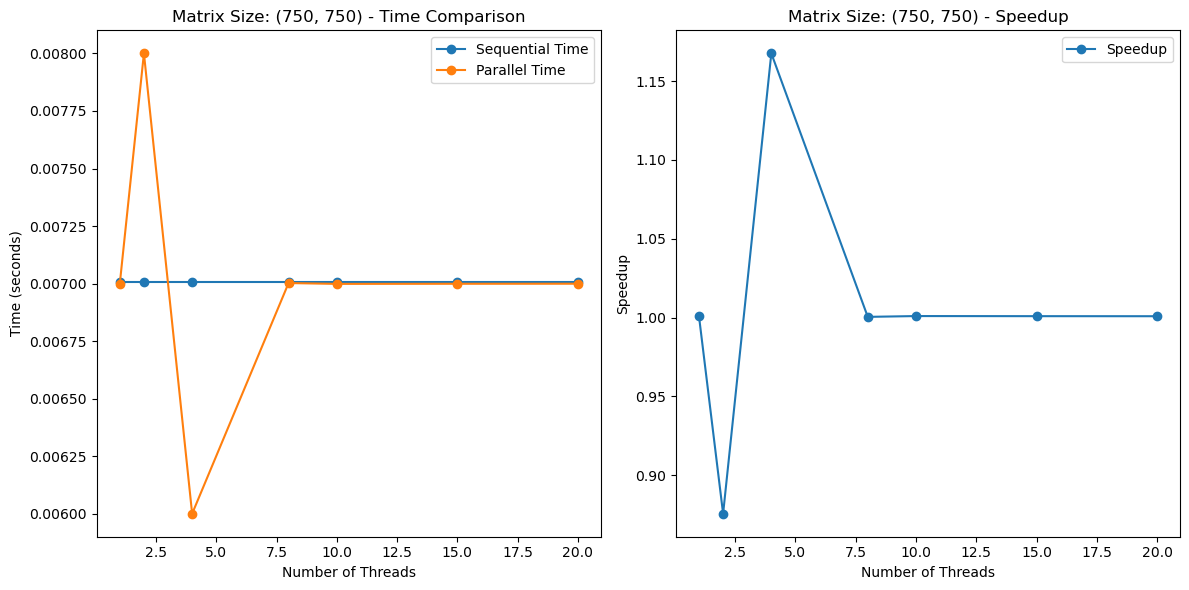

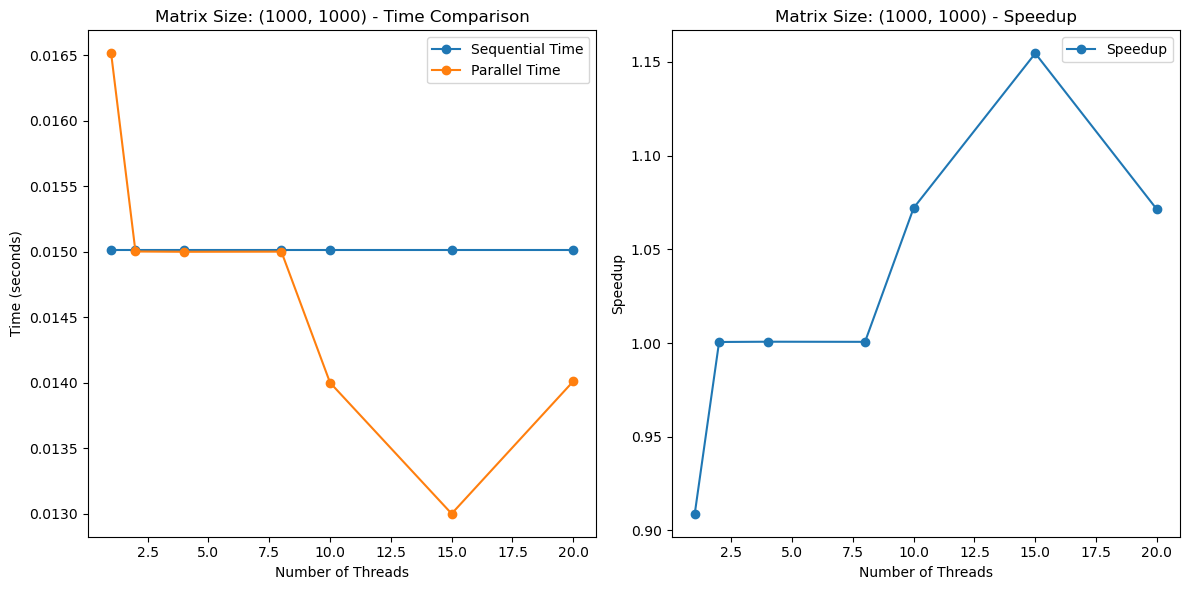

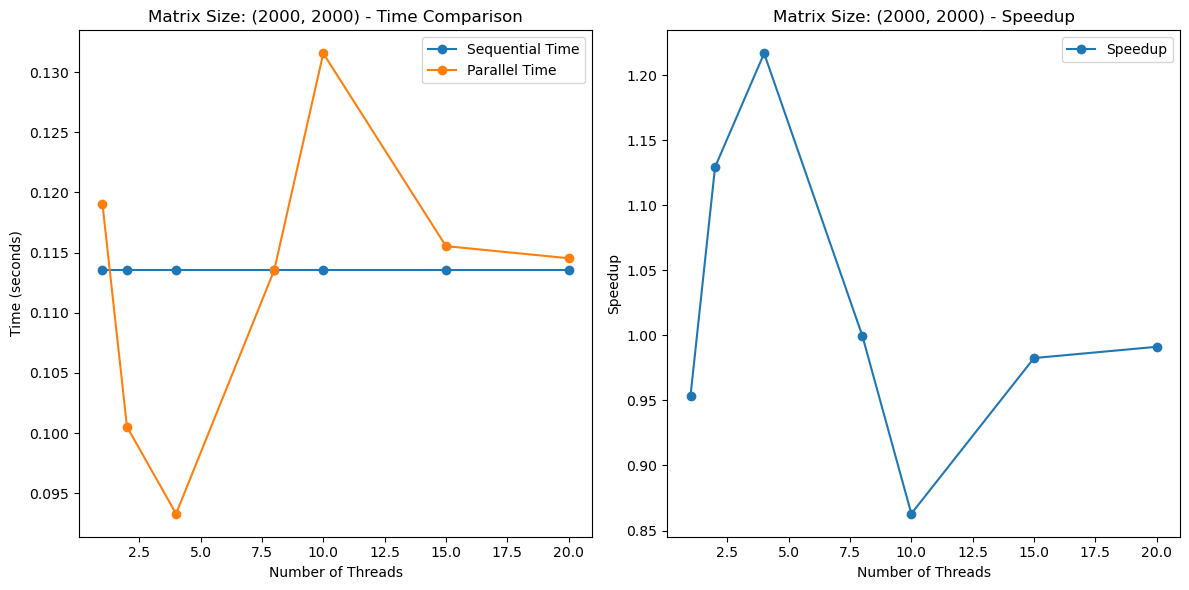

In [39]:
import matplotlib.pyplot as plt
matrix_sizes = df['Matrix Size'].unique()

for matrix_size in matrix_sizes:
    subset_df = df[df['Matrix Size'] == matrix_size]

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(subset_df['Threads'], subset_df['Sequential Time'], marker='o', label='Sequential Time')
    plt.plot(subset_df['Threads'], subset_df['Parallel Time'], marker='o', label='Parallel Time')
    plt.title(f"Matrix Size: {matrix_size} - Time Comparison")
    plt.xlabel("Number of Threads")
    plt.ylabel("Time (seconds)")
    plt.legend()

    plt.subplot(1, 2, 2)
    speedup = subset_df['Sequential Time'] / subset_df['Parallel Time']
    plt.plot(subset_df['Threads'], speedup, marker='o', label='Speedup')
    plt.title(f"Matrix Size: {matrix_size} - Speedup")
    plt.xlabel("Number of Threads")
    plt.ylabel("Speedup")
    plt.legend()

    plt.tight_layout()
    plt.show()


### visualization of performance comparison between serial, parallel using NumPY code

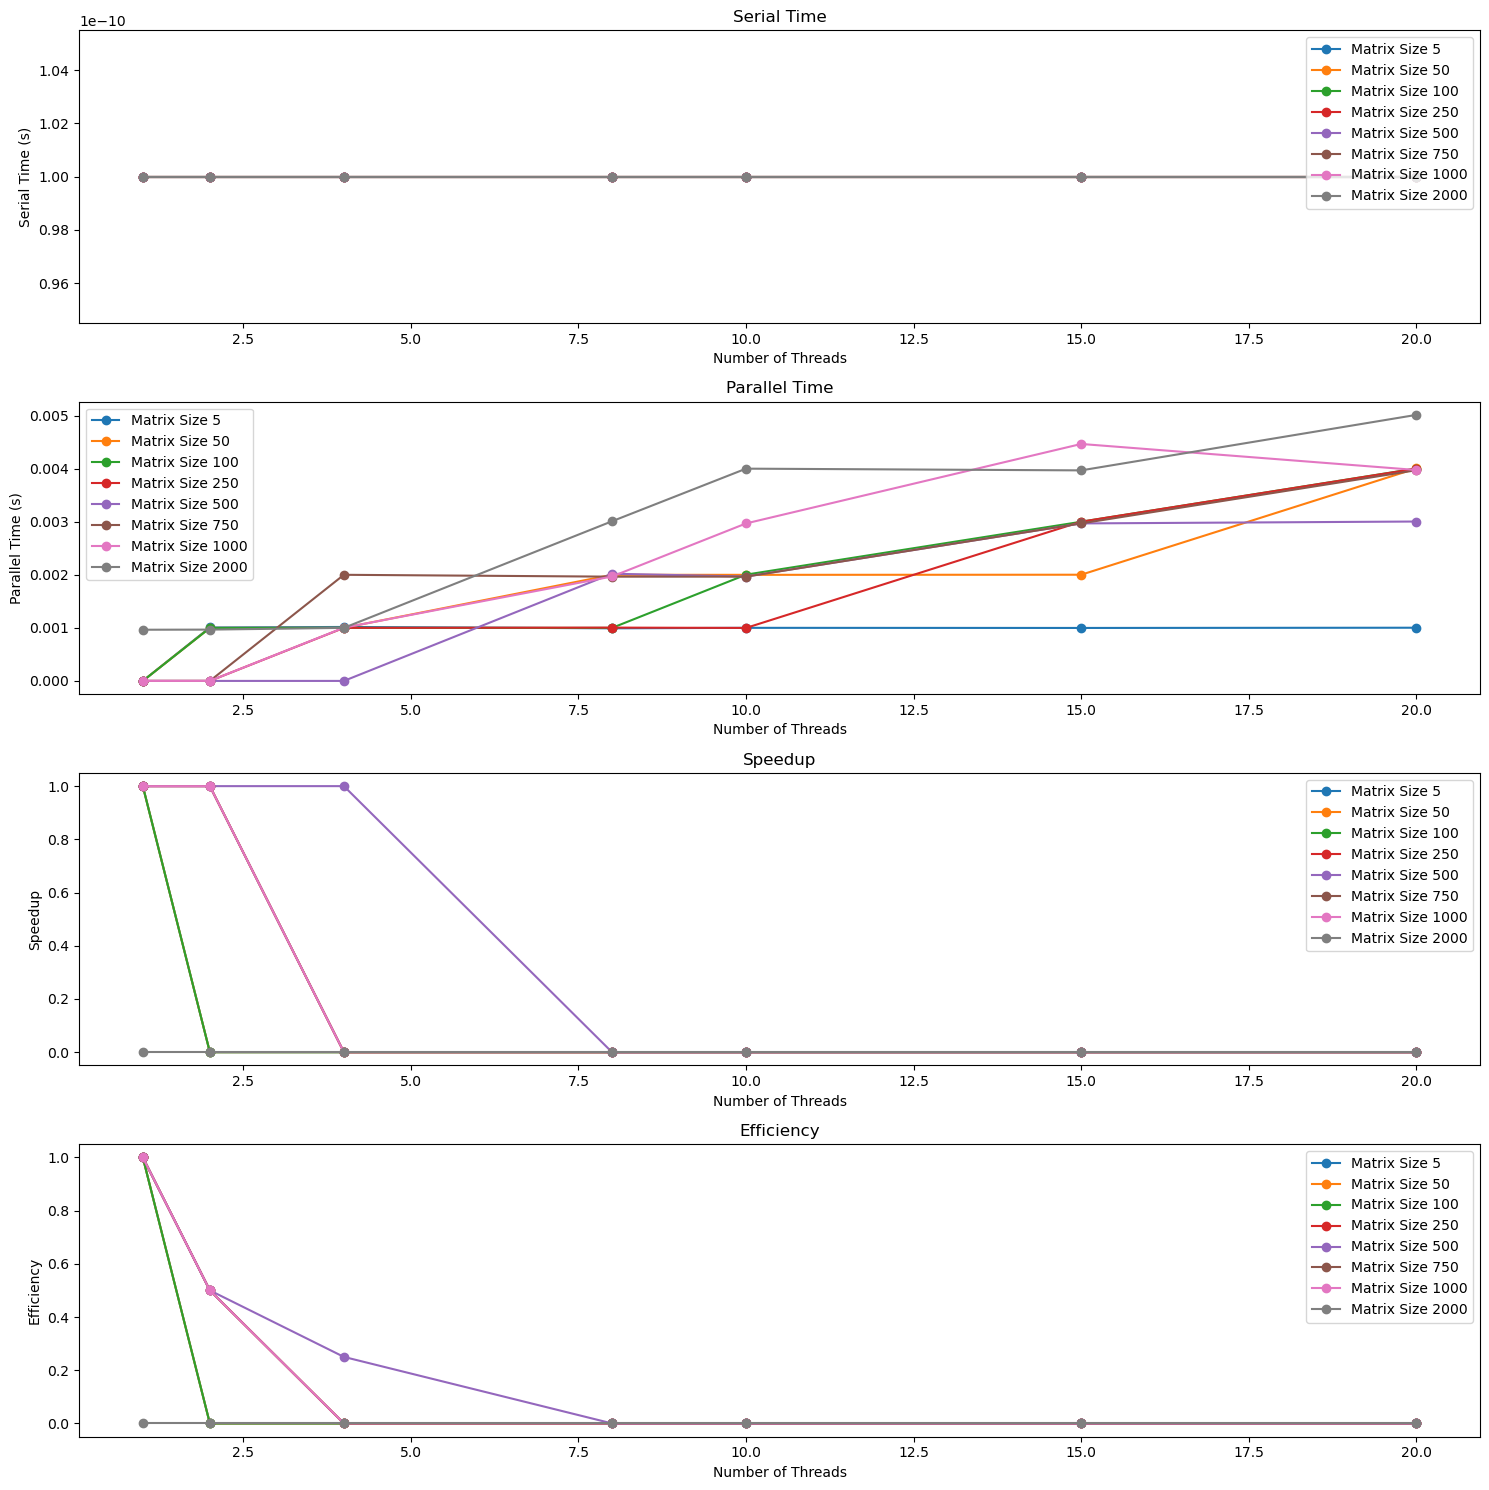

In [40]:
def plot_matrix_size(df2, matrix_size):
    plt.figure(figsize=(15, 15))

    plt.subplot(4, 1, 1)
    for size in matrix_sizes:
        data = df2[df2['Matrix Size'] == size]
        plt.plot(data['Threads'], data['Serial Time'], label=f'Matrix Size {size}', marker='o')
    plt.title('Serial Time')
    plt.xlabel('Number of Threads')
    plt.ylabel('Serial Time (s)')
    plt.legend()

    plt.subplot(4, 1, 2)
    for size in matrix_sizes:
        data = df2[df2['Matrix Size'] == size]
        plt.plot(data['Threads'], data['Parallel Time'], label=f'Matrix Size {size}', marker='o')
    plt.title('Parallel Time')
    plt.xlabel('Number of Threads')
    plt.ylabel('Parallel Time (s)')
    plt.legend()

    plt.subplot(4, 1, 3)
    for size in matrix_sizes:
        data = df2[df2['Matrix Size'] == size]
        plt.plot(data['Threads'], data['Speedup'], label=f'Matrix Size {size}', marker='o')
    plt.title('Speedup')
    plt.xlabel('Number of Threads')
    plt.ylabel('Speedup')
    plt.legend()

    plt.subplot(4, 1, 4)
    for size in matrix_sizes:
        data = df2[df2['Matrix Size'] == size]
        plt.plot(data['Threads'], data['Efficiency'], label=f'Matrix Size {size}', marker='o')
    plt.title('Efficiency')
    plt.xlabel('Number of Threads')
    plt.ylabel('Efficiency')
    plt.legend()

    plt.tight_layout()
    plt.show()


matrix_sizes = df2['Matrix Size'].unique()
plot_matrix_size(df2, matrix_sizes)


### Explain whether or not the scaling behavior is as expected.

In general, NumPy's matrix multiplication is faster than using loops for matrix operations in Python. NumPy is a powerful numerical computing library that is highly optimized. Which can be observed from the graph. Also we can see that as size of matrix increases parallel processing is faster then squencial and it gets faster as the number of thread increase. So we can say scaling behavior is as expected.